<a href="https://colab.research.google.com/github/euigyuhwang/BigFig/blob/gh-pages/Principal_Component_Analysis_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)

## Brief primer and history
Principal component analysis (PCA) is a statistical procedure that uses an [orthogonal transformation](https://en.wikipedia.org/wiki/Orthogonal_transformation) to convert a set of observations of possibly correlated variables into a set of values of [linearly uncorrelated](https://en.wikipedia.org/wiki/Correlation_and_dependence) variables called principal components. The number of distinct principal components is equal to the smaller of the number of original variables or the number of observations minus one. This transformation is defined in such a way that the first principal component has the largest possible [variance](https://en.wikipedia.org/wiki/Variance) (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is [orthogonal](https://en.wikipedia.org/wiki/Orthogonal) the preceding components. The resulting vectors are an uncorrelated [orthogonal basis set](https://en.wikipedia.org/wiki/Orthogonal_basis_set). 

PCA is sensitive to the relative scaling of the original variables.

PCA was invented in 1901 by [Karl Pearson](https://en.wikipedia.org/wiki/Karl_Pearson) as an analogue of the principal axis theorem in mechanics; it was later independently developed and named by [Harold Hotelling](https://en.wikipedia.org/wiki/Harold_Hotelling) in the 1930s.

## Mathematical details
PCA is mathematically defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.[3]

Consider a data matrix, $\mathbf{X}$, with column-wise zero empirical mean (the sample mean of each column has been shifted to zero), where each of the $n$ rows represents a different repetition of the experiment, and each of the $p$ columns gives a particular kind of feature (say, the results from a particular sensor).

Mathematically, the transformation is defined by a set of p-dimensional vectors of weights or loadings
${\displaystyle \mathbf {w} _{(k)}=(w_{1},\dots ,w_{p})_{(k)}} \mathbf {w} _{(k)}=(w_{1},\dots ,w_{p})_{(k)}$ that map each row vector ${\displaystyle \mathbf {x} _{(i)}} \mathbf{x}_{(i)}$ of $\mathbf{X}$ to a new vector of principal component scores ${\displaystyle \mathbf {t} _{(i)}=(t_{1},\dots ,t_{m})_{(i)}}$ given by

$${\displaystyle {t_{k}}_{(i)}=\mathbf {x} _{(i)}\cdot \mathbf {w} _{(k)}\qquad \mathrm {for} \qquad i=1,\dots ,n\qquad k=1,\dots ,m} {\displaystyle {t_{k}}_{(i)}=\mathbf {x} _{(i)}\cdot \mathbf {w} _{(k)}\qquad \mathrm {for} \qquad i=1,\dots ,n\qquad k=1,\dots ,m}$$

in such a way that the individual variables ${\displaystyle t_{1},\dots ,t_{m}}$ of t considered over the data set successively inherit the maximum possible variance from $\mathbf{x}$, with each loading vector $\mathbf{w}$ constrained to be a unit vector.

In order to maximize variance, the first loading vector $\mathbf {w} _{(1)}$ thus has to satisfy

$$ {\displaystyle \mathbf {w} _{(1)}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\sum _{i}\left(t_{1}\right)_{(i)}^{2}\right\}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\sum _{i}\left(\mathbf {x} _{(i)}\cdot \mathbf {w} \right)^{2}\right\}}$$

Equivalently, writing this in matrix form gives

$${\displaystyle \mathbf {w} _{(1)}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\{\Vert \mathbf {Xw} \Vert ^{2}\}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\mathbf {w} ^{T}\mathbf {X} ^{T}\mathbf {Xw} \right\}}$$

Since $\mathbf {w} _{(1)}$ has been defined to be a unit vector, it equivalently also satisfies
$${\displaystyle \mathbf {w} _{(1)}={\operatorname {\arg \,max} }\,\left\{{\frac {\mathbf {w} ^{T}\mathbf {X} ^{T}\mathbf {Xw} }{\mathbf {w} ^{T}\mathbf {w} }}\right\}}$$.

With $\mathbf {w} _{(1)}$ found, the first principal component of a data vector $\mathbf {x} _{(i)}$ can then be given as a score $\mathbf {t} _{(i)}$ = $\mathbf {x} _{(i)}$ ⋅ $\mathbf {w} _{(1)}$ in the transformed co-ordinates, or as the corresponding vector in the original variables, {$\mathbf {x} _{(i)}$ ⋅ $\mathbf {w} _{(1)}$} $\mathbf {w} _{(1)}$.

The $k^{th}$ component can be found by subtracting the first $k$ − 1 principal components from $\mathbf{X}$:

$${\displaystyle \mathbf {\hat {X}} _{k}=\mathbf {X} -\sum _{s=1}^{k-1}\mathbf {X} \mathbf {w} _{(s)}\mathbf {w} _{(s)}^{\rm {T}}}$$
and then finding the loading vector which extracts the maximum variance from this new data matrix

$${\displaystyle \mathbf {w} _{(k)}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {arg\,max} }}\left\{\Vert \mathbf {\hat {X}} _{k}\mathbf {w} \Vert ^{2}\right\}={\operatorname {\arg \,max} }\,\left\{{\tfrac {\mathbf {w} ^{T}\mathbf {\hat {X}} _{k}^{T}\mathbf {\hat {X}} _{k}\mathbf {w} }{\mathbf {w} ^{T}\mathbf {w} }}\right\}}$$

Computing the [singular value decomposition (SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition) is now the standard way to calculate a principal components analysis from a data matrix

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read in the data and perform basic exploratory analysis

In [ ]:
!git clone https://github.com/hukim1112/MLDL.git

Cloning into 'MLDL'...
remote: Enumerating objects: 193, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 193 (delta 52), reused 181 (delta 40), pack-reused 0
Receiving objects: 100% (193/193), 41.39 MiB | 29.64 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [ ]:
df = pd.read_csv('MLDL/lecture3/wine.data.csv')
df.head(3)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [ ]:
df['Class'].unique()

array([1, 2, 3])

#### Basic statistics

In [ ]:
df.iloc[:,1:].describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Boxplots by output labels/classes

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

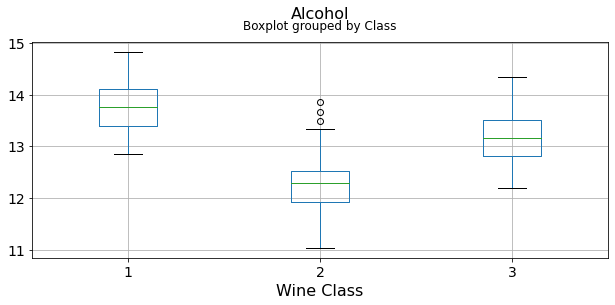

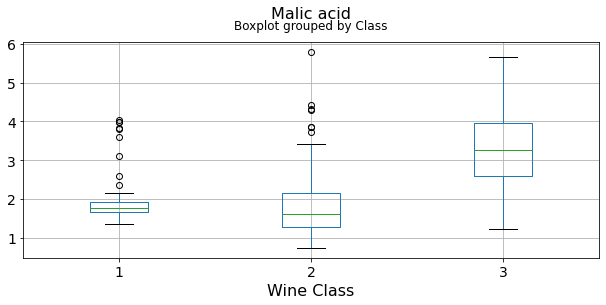

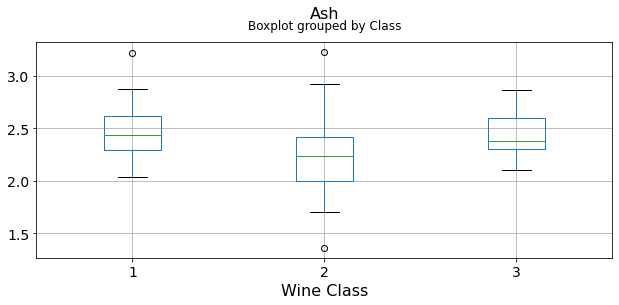

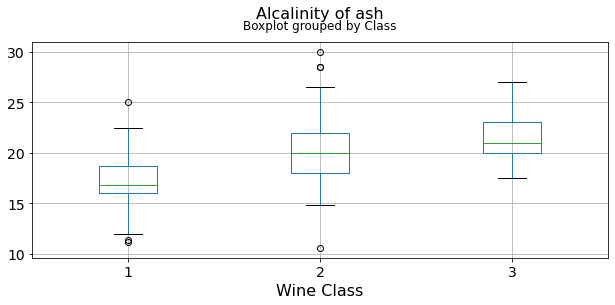

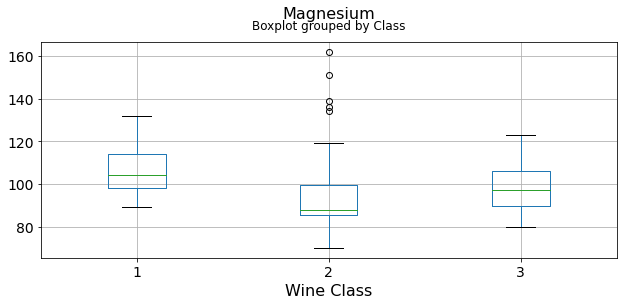

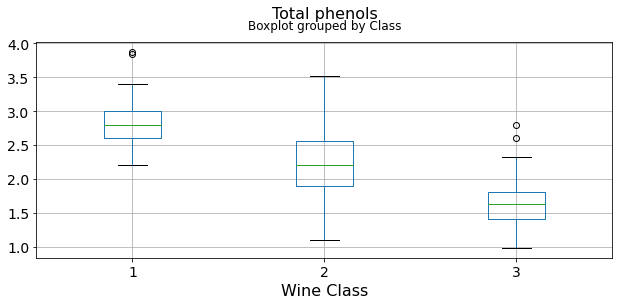

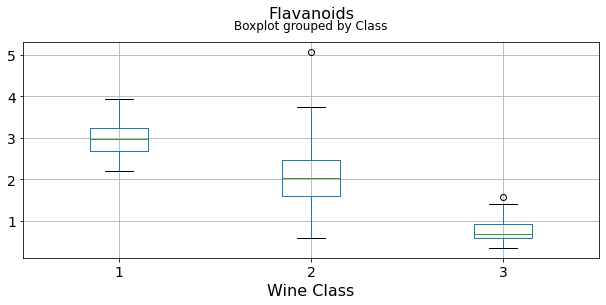

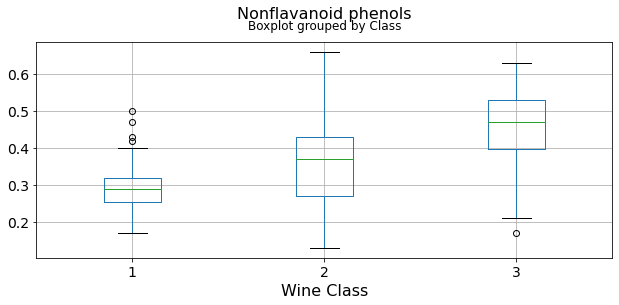

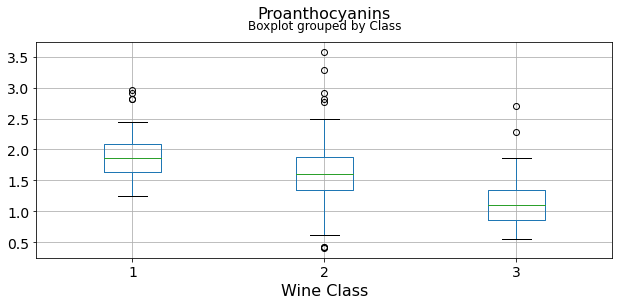

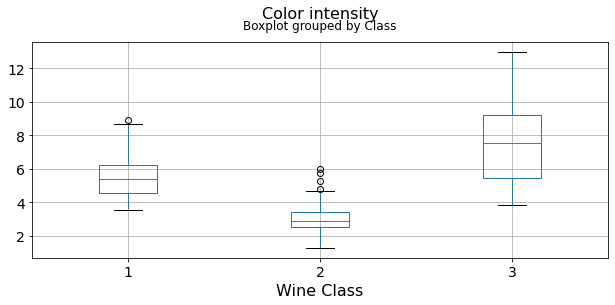

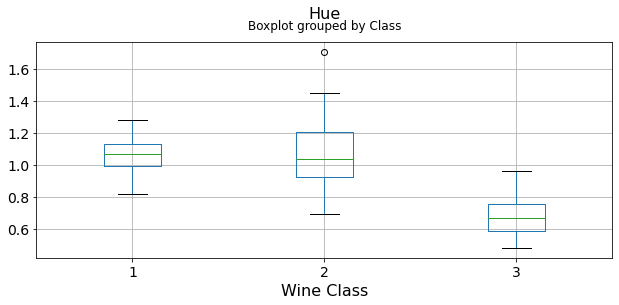

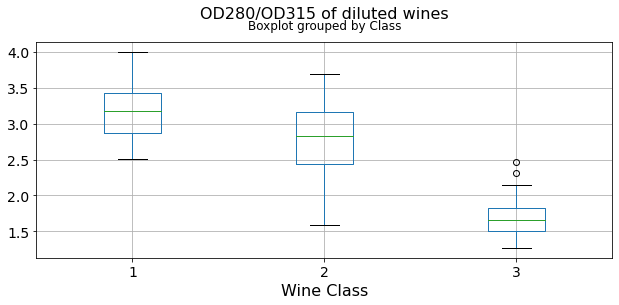

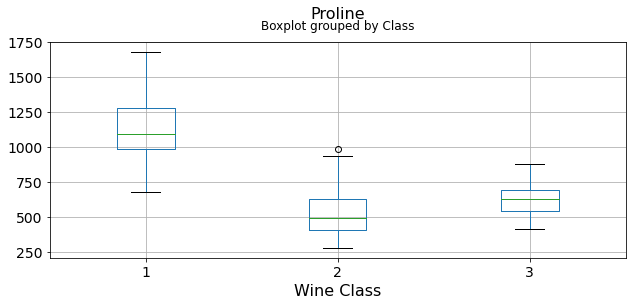

In [ ]:
for c in df.columns[1:]:
    df.boxplot(c,by='Class',figsize=(10,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Wine Class", fontsize=16)

**It can be seen that some features classify the wine labels pretty clearly.** For example, Alcalinity, Total Phenols, or Flavonoids produce boxplots with well-separated medians, which are clearly indicative of wine classes.

Below is an example of class seperation using two variables

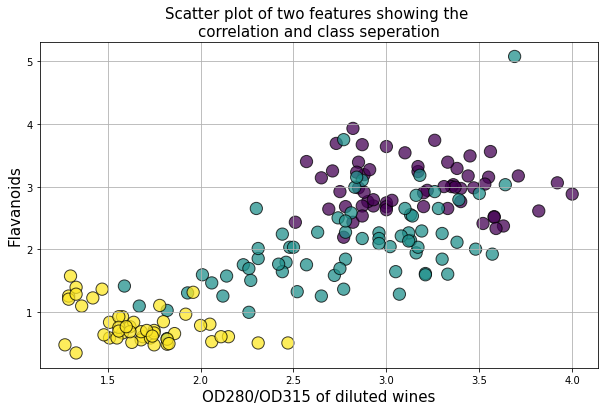

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['OD280/OD315 of diluted wines'],df['Flavanoids'],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)
plt.show()

#### Are the features independent? Plot co-variance matrix

It can be seen that there are some good amount of correlation between features i.e. they are not independent of each other, as assumed in Naive Bayes technique. However, we will still go ahead and apply yhe classifier to see its performance.

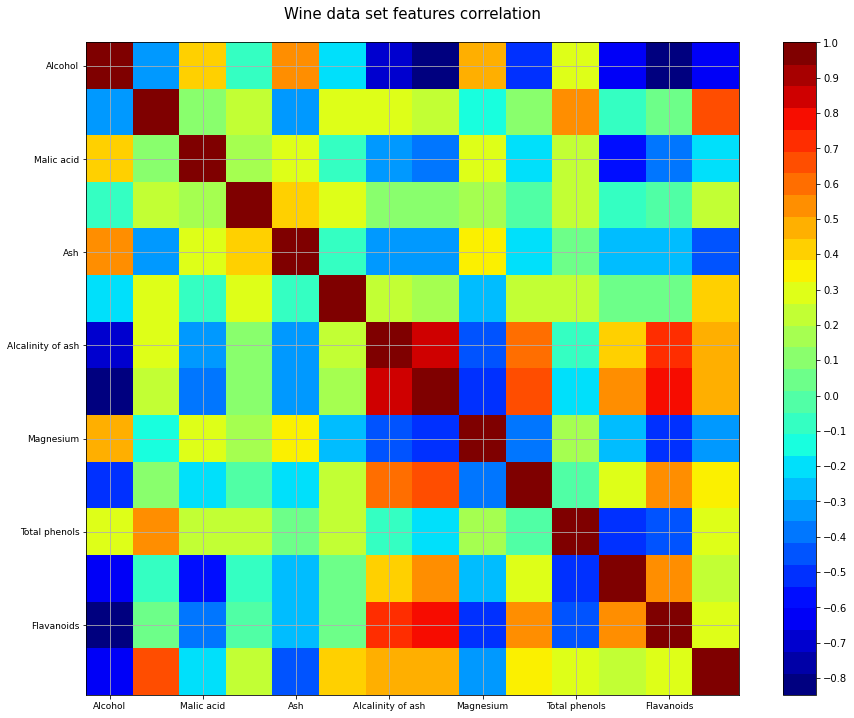

In [ ]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

## Principal Component Analysis

### Data scaling
PCA requires scaling/normalization of the data to work properly

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X = df.drop('Class',axis=1)
y = df['Class']

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
dfx = pd.DataFrame(data=X,columns=df.columns[1:])

In [ ]:
dfx.head(10)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


In [ ]:
dfx.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.247442e-18,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


### PCA class import and analysis

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=None)

In [ ]:
dfx_pca = pca.fit(dfx)

#### Plot the _explained variance ratio_

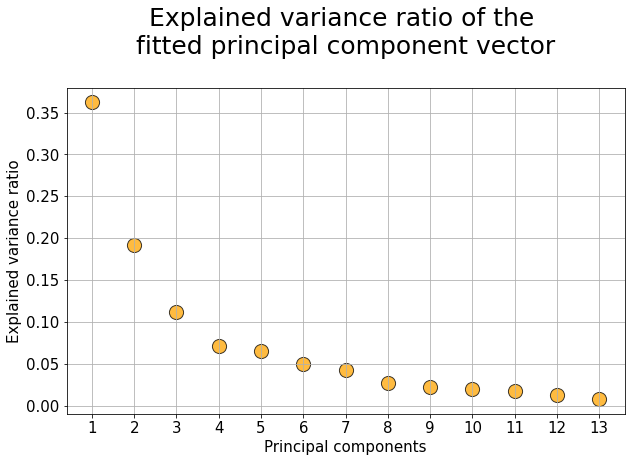

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

**The above plot means that the $1^{st}$ principal component explains about 36% of the total variance in the data and the $2^{nd}$ component explians further 20%. Therefore, if we just consider first two components, they together explain 56% of the total variance.**

### Showing better class separation using principal components

#### Transform the scaled data set using the fitted PCA object

In [ ]:
dfx_trans = pca.transform(dfx)

#### Put it in a data frame

In [ ]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431,0.401654,0.394893,-0.152146,-0.101996,0.405585,-0.379433,0.145155
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121,0.052891,-0.371934,-0.457016,1.016563,-0.442433,0.141230,-0.271778
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806,0.032376,0.232979,0.123370,0.735600,0.293555,0.379663,-0.110164
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181,0.125285,-0.499578,0.606589,0.174107,-0.508933,-0.635249,0.142084
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392,-0.874352,0.150580,0.230489,0.179420,0.012478,0.550327,-0.042455


#### Plot the first two columns of this transformed data set with the color set to original ground truth class label

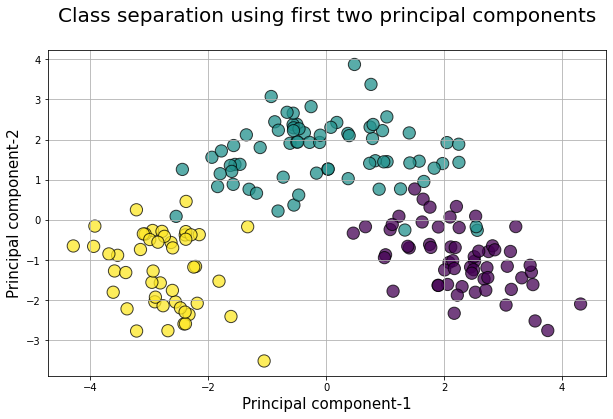

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()